In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Import Data

In [2]:
# read in loan data
df = pd.read_csv('Data/loan.csv')

In [3]:
# read in cleaned train and test data; concatenate to single df
final_train_df = pd.read_csv('Data/train.csv')
final_test_df = pd.read_csv('Data/test.csv')
cl_df = pd.concat([final_train_df, final_test_df], ignore_index=True)

In [4]:
# final_train_df.shape  #(979767, 109)
# final_test_df.shape   #(326589, 109)
# cleaned_df.shape      #(1306356, 109)

In [5]:
# list all column names
for col_name in cl_df.columns: 
    print(col_name)


acc_now_delinq
annual_inc
avg_cur_bal
bc_open_to_buy
bc_util
delinq_2yrs
delinq_amnt
dti
funded_amnt
funded_amnt_inv
inq_last_6mths
installment
int_rate
loan_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_op_past_12m
open_acc
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec
pub_rec_bankruptcies
revol_bal
revol_util
tot_coll_amt
tot_cur_bal
tot_hi_cred_lim
total_acc
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
total_rev_hi_lim
acc_open_past_24mths
addr_state_NY
addr_state_Rare
addr_state_CA
addr_state_FL
addr_state_TX
emp_length_other
emp_length_2 years
emp_length_5 years
emp_length_Rare
emp_length_10+ years
emp_length_1 year
emp_length_3 years
emp_length_< 1 year
emp_length_4 years
emp_title_other
emp_title_Rare
grade_F
grade_B
grade_D
grade_C
grade_E
grade_A
grade_G
home_ownership_MO

### Purpose of loans

Text(0, 0.5, 'Percentage of Loans')

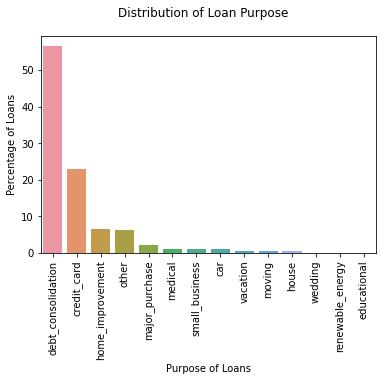

In [6]:
## Reason for loans
purpose_df = pd.DataFrame(df.purpose.value_counts(normalize=True)*100)
purpose_df.reset_index(inplace=True)
ax = sns.barplot(x='index',y='purpose',data=purpose_df)
#
plt.xticks(rotation=90)
plt.suptitle('Distribution of Loan Purpose', fontsize=12)
ax.set_xlabel('Purpose of Loans')
ax.set_ylabel('Percentage of Loans')

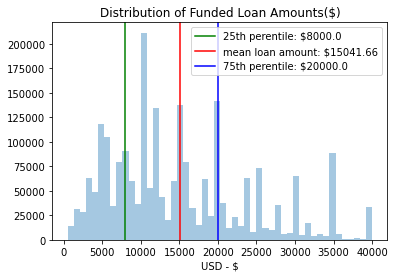

In [7]:
### Loan amounts    Count vs. Amount
funded_amount = df['funded_amnt'].values

ax = sns.distplot(funded_amount, kde = False)
ax.axvline(np.percentile(funded_amount,[25]), color='g',
              label = "25th perentile: ${}".format(np.percentile(funded_amount,[25])[0],2))
ax.axvline(funded_amount.mean(),color='r',
             label='mean loan amount: ${}'.format(round(funded_amount.mean(),2)))
ax.axvline(np.percentile(funded_amount,[75]), color='b',
             label = "75th perentile: ${}".format(np.percentile(funded_amount,[75])[0],2))
ax.set_title("Distribution of Funded Loan Amounts($)")
ax.set_xlabel("USD - $")
ax.legend()

Text(0, 0.5, 'Percentage of Loans')

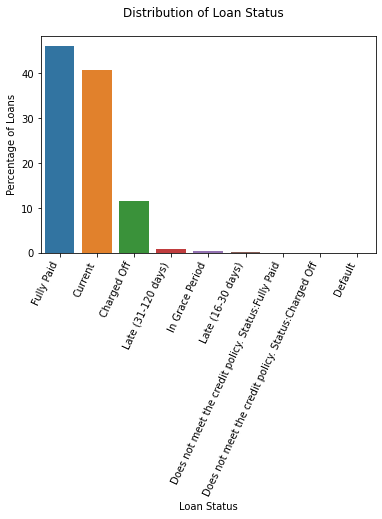

In [8]:
## Loan status vs counts
status_df = pd.DataFrame(df.loan_status.value_counts(normalize=True)*100)
status_df.reset_index(inplace=True)
ax = sns.barplot(x='index', y='loan_status',data=status_df)

plt.suptitle('Distribution of Loan Status', fontsize=12)
plt.xticks(rotation=65, ha='right')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Percentage of Loans')

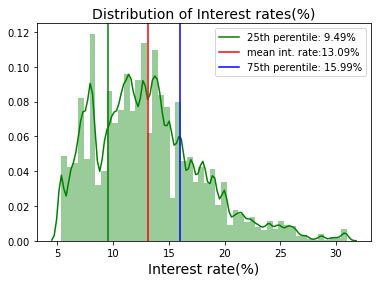

In [9]:
interest_rate = df['int_rate'].values

ax = sns.distplot(interest_rate, color="green")
ax.set_title("Distribution of Interest rates(%)", fontsize=14,)
ax.set_xlabel("%",fontsize=14)
ax.axvline(np.percentile(interest_rate,[25]),
              label = "25th perentile: {}%".format(np.percentile(interest_rate,[25])[0],2),
             color='g')
ax.axvline(interest_rate.mean(),color='r',
              label='mean int. rate:{}%'.format(round(interest_rate.mean(),2)))
ax.axvline(np.percentile(interest_rate,[75]),
             label = "75th perentile: {}%".format(np.percentile(interest_rate,[75])[0],2),
             color='b')
ax.set_xlabel("Interest rate(%)",fontsize=14)
ax.legend()

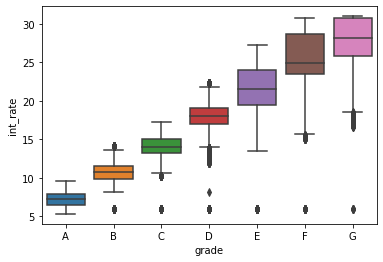

In [10]:
## Interest rates by lending club grade

## LC assigns grade to loans
sns.boxplot(x='grade', y='int_rate', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], showfliers=True)

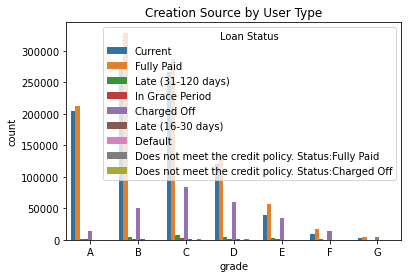

In [19]:
sns.countplot(x='grade', hue='loan_status', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Creation Source by User Type')
plt.legend(title='Loan Status')
